In [1]:
import altair as alt
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')

alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
df = pd.read_csv('../data/arab_observer_1960_1962_stopwords_ner_congo.csv')
df_hathi = pd.read_csv('../data/hathi_trust_1963_1966_stopwords_ner_congo.csv')

df = df.drop(['Unnamed: 0', 'index', 'google_vision_text', 'file_name', 'vol', 'spacy_text','tokenized_text' ], axis=1)

df_hathi.rename(columns={'first_month': 'month'}, inplace=True)
df_hathi.rename(columns={'first_month_index': 'month_index'}, inplace=True)
df_hathi.rename(columns={'page': 'page_number'}, inplace=True)
df_hathi = df_hathi.drop(['Unnamed: 0', 'level_0', 'htrc_vol', 'index', 'lowercase','second_month', 'spacy_text', 'tokenized_text', 'second_month_index'], axis=1)
df_hathi['day'] = '01'
df_hathi['date'] = df_hathi.year.astype(str)+ '-' +df_hathi.month.astype(str) +'-' + df_hathi.day.astype(str)
df_hathi['string_date'] = df_hathi.date.astype(str)
df['string_date'] = df.date.astype(str)


df_1 = df.append(df_hathi, ignore_index=True)
df_1['datetime'] = pd.to_datetime(df_1['date'], format='%Y%m%d', errors='ignore')

# df_1.to_csv('all_ao_data.csv')
df_1.year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966])

In [37]:
df = df_1
grouped_df = df.groupby(['year', 'term'])['word_counts'].sum().reset_index()
grouped_pages = df.groupby(['year', 'term'])['page_number'].count().reset_index()
grouped_tokens = df.groupby(['year',])['tokenized_counts'].sum().reset_index()
co = pd.merge(grouped_df, grouped_pages, on=['year', 'term'])
final_group = pd.merge(co, grouped_tokens, on=['year'], how='left')
df_2 = pd.read_csv('grouped_totals.csv')
df_2 = df_2.drop(['Unnamed: 0'], axis=1)
df_2.rename(columns={'page_number': 'pn', 'tokenized_counts': 'tc'}, inplace=True)
f = pd.merge(final_group, df_2, on=['year'])
# final_group.rename(columns={'page_number_y': 'pn', 'tokenized_counts_y': 'tc'}, inplace=True)
# tm = pd.melt(final_group, id_vars=['year', 'term'])
# # tm.variable.unique()
# grouped_df = final_group.groupby(['year'])['word_counts'].sum().reset_index()
# grouped_pages = final_group.groupby(['year'])['page_number'].count().reset_index()
# grouped_tokens = df.groupby(['year', 'term'])['tokenized_counts'].sum().reset_index()
# co = pd.merge(grouped_df, grouped_pages, on=['year', 'term'])
# final_group = pd.merge(co, grouped_tokens, on=['year', 'term'])
# f['perc'] = f.word_counts / f.tc * 100
# f['year_string'] = f.year.astype(str)
# alt.Chart(f).mark_bar().encode(
#     x=alt.X("year:N", axis=alt.Axis(title='', labelAngle=0)),
#     y=alt.Y("perc:Q", axis=alt.Axis(title='')),
# ).properties(height=200, width=400, title='Congo Crisis Terms as % of Overall Words in The Arab Observer')

f[f.year == 1960]

year          term  word_counts  page_number  tokenized_counts  \
0  1960       belgian          210           88            189094   
1  1960         congo          774          176            189094   
2  1960      kasavubu           40           18            189094   
3  1960       katanga          112           42            189094   
4  1960  leopoldville           30           22            189094   
5  1960       lumumba          128           56            189094   
6  1960        mobutu           40            8            189094   
7  1960       patrice           34           28            189094   
8  1960       tshombe          118           40            189094   

   spacy_counts   pn      tc  
0         16109  460  166765  
1         16109  460  166765  
2         16109  460  166765  
3         16109  460  166765  
4         16109  460  166765  
5         16109  460  166765  
6         16109  460  166765  
7         16109  460  166765  
8         16109  460  166765

In [42]:
print(f[f.year == 1960], final[final.year == 1960])

   year          term  word_counts  page_number  tokenized_counts  \
0  1960       belgian          210           88            189094   
1  1960         congo          774          176            189094   
2  1960      kasavubu           40           18            189094   
3  1960       katanga          112           42            189094   
4  1960  leopoldville           30           22            189094   
5  1960       lumumba          128           56            189094   
6  1960        mobutu           40            8            189094   
7  1960       patrice           34           28            189094   
8  1960       tshombe          118           40            189094   

   spacy_counts   pn      tc  
0         16109  460  166765  
1         16109  460  166765  
2         16109  460  166765  
3         16109  460  166765  
4         16109  460  166765  
5         16109  460  166765  
6         16109  460  166765  
7         16109  460  166765  
8         16109  460  166765  

In [39]:
df = pd.read_csv('../data/final_ner_congo_identified.csv')

In [40]:
grouped_df = df.groupby(['date','year', 'binned','term'])['word_counts'].sum().reset_index()
grouped_pages = df.groupby(['date','year', 'binned','term'])['page_number'].count().reset_index()
grouped_tokens = df.groupby(['date','year'])['tokenized_counts'].sum().reset_index()
co = pd.merge(grouped_df, grouped_pages, on=['date','year', 'binned','term'])
final_group = pd.merge(co, grouped_tokens, on=['date', 'year'], how='left')
test = final_group.groupby(['year', 'term'])['word_counts'].sum().reset_index()
tokens = df.groupby(['year'])['tokenized_counts'].sum().reset_index()

final = pd.merge(test, tokens, on=['year'])
# df_2 = pd.read_csv('grouped_totals.csv')
# df_2 = df_2.drop(['Unnamed: 0'], axis=1)
# df_2.rename(columns={'page_number': 'pn', 'tokenized_counts': 'tc'}, inplace=True)
# f = pd.merge(final_group, df_2, on=['year'])
final
# sns.set_style("white")
# g = sns.lmplot(y="word_counts", x="tokenized_counts", col="term", data=final, col_wrap=3, height=3);
# axes = g.axes.flatten()
# axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Size over Time')
# axes[0].set_ylabel('summed keyword counts')
# axes[0].set_xlabel('corpus word counts')


year          term  word_counts  tokenized_counts
0   1960       belgian          107             94168
1   1960         congo          386             94168
2   1960      kasavubu           20             94168
3   1960       katanga           56             94168
4   1960  leopoldville           13             94168
5   1960       lumumba           58             94168
6   1960        mobutu           20             94168
7   1960       patrice           15             94168
8   1960       tshombe           62             94168
9   1961       belgian          131            230199
10  1961         congo          736            230199
11  1961      kasavubu          110            230199
12  1961       katanga          171            230199
13  1961  leopoldville           45            230199
14  1961       lumumba          199            230199
15  1961        mobutu           61            230199
16  1961       patrice           65            230199
17  1961       tshombe          128            230199
18  1962       belgian           57            142126
19  1962         congo          394            142126
20  1962      kasavubu            2            142126
21  1962       katanga          188            142126
22  1962  leopoldville           39            142126
23  1962       lumumba           25            142126
24  1962        mobutu            3            142126
25  1962       patrice           14            142126
26  1962       tshombe          143            142126
27  1963       belgian           33            102263
28  1963         congo          264            102263
29  1963      kasavubu            5            102263
..   ...           ...          ...               ...
33  1963        mobutu            7            102263
34  1963       patrice            8            102263
35  1963       tshombe          106            102263
36  1964       belgian           57            118816
37  1964         congo          451            118816
38  1964      kasavubu           15            118816
39  1964       katanga           49            118816
40  1964  leopoldville           50            118816
41  1964       lumumba           27            118816
42  1964        mobutu            5            118816
43  1964       patrice            7            118816
44  1964       tshombe          133            118816
45  1965       belgian           38             82918
46  1965         congo          327             82918
47  1965      kasavubu            9             82918
48  1965       katanga            7             82918
49  1965  leopoldville           37             82918
50  1965       lumumba           24             82918
51  1965        mobutu            7             82918
52  1965       patrice            9             82918
53  1965       tshombe          123             82918
54  1966       belgian           36             50283
55  1966         congo          151             50283
56  1966      kasavubu            4             50283
57  1966       katanga            4             50283
58  1966  leopoldville           21             50283
59  1966       lumumba           13             50283
60  1966        mobutu           66             50283
61  1966       patrice            4             50283
62  1966       tshombe           10             50283

[63 rows x 4 columns]

In [31]:
years = final.year.unique().tolist()
import statsmodels.api as sm
print(years)
terms = final.term.unique().tolist()

for t in terms:
    r = final.loc[final.term == t]
    X = r.tokenized_counts
    y = r.word_counts

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(t, model.summary())

[1960, 1961, 1962, 1963, 1964, 1965, 1966]
belgian                             OLS Regression Results                            
Dep. Variable:            word_counts   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     48.95
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           0.000425
Time:                        17:04:57   Log-Likelihood:                -32.365
No. Observations:                   7   AIC:                             66.73
Df Residuals:                       6   BIC:                             66.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/zgl3n/.local/share/virtualenvs/CRDH-R-3_7VyR/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/zgl3n/.local/share/virtualenvs/CRDH-R-3_7VyR/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/zgl3n/.local/share/virtualenvs/CRDH-R-3_7VyR/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/zgl3n/.local/share/virtualenvs/CRDH-R-3_7VyR/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were give

In [22]:
z = f.groupby(['year', 'tc'])['word_counts'].sum().reset_index()
z

year      tc  word_counts
0  1960  166765         1486
1  1961  469034         3292
2  1962  844048         1732
3  1963  748309          621
4  1964  879757          871
5  1965  538635          635
6  1966  501289          415

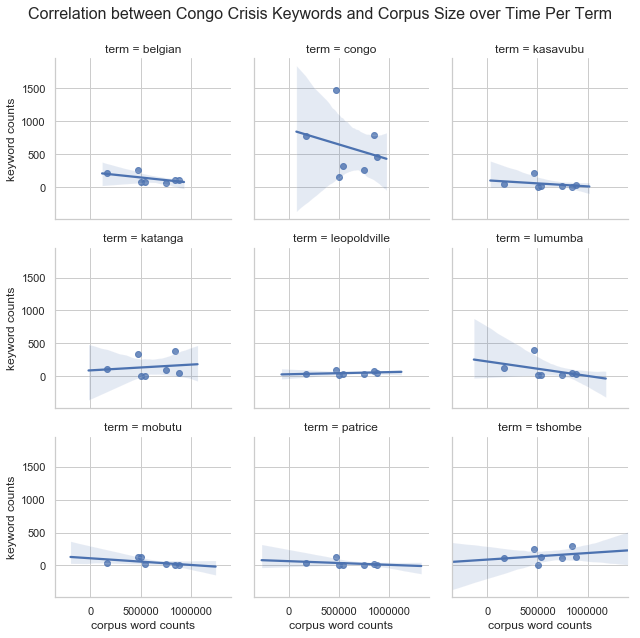

In [46]:
sns.set_style("whitegrid")
x = f
x['corpus word counts'] = x.tc
x['keyword counts'] = x.word_counts
g = sns.lmplot(x='corpus word counts', y='keyword counts',
           col="term", data=x, col_wrap=3, height=3);
# fig = g.fig
# # fig.suptitle("Custom Super Title")
# a1 = fig.axes[1]
# a1.set_title("Custom Title")
# axes = g.axes.flatten()
# axes.set_title('Correlation between Congo Crisis Keywords and Corpus Distributions over Time Per Term')
# axes[0].set_ylabel('')
# axes[0].set_xlabel('')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlation between Congo Crisis Keywords and Corpus Size over Time Per Term', fontsize=16)
g.savefig('congo_corpus_terms.png')

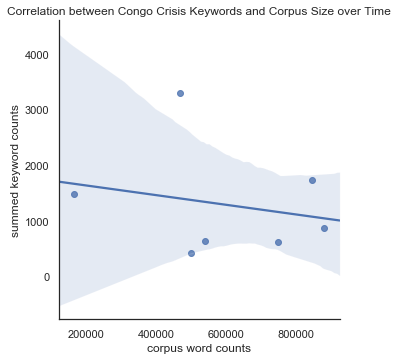

In [47]:
sns.set_style("white")
g = sns.lmplot(x="tc", y="word_counts", data=z);
axes = g.axes.flatten()
axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Size over Time')
axes[0].set_ylabel('summed keyword counts')
axes[0].set_xlabel('corpus word counts')

g.savefig('congo_corpus.png')

In [ ]:
import statsmodels.api as sm

X = hathi["page_number"]
y = hathi['tokenized_counts']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [12]:
df = df_1
grouped_df = df.groupby(['year', 'term'])['word_counts'].sum().reset_index()
grouped_pages = df.groupby(['year', 'term'])['page_number'].count().reset_index()
grouped_tokens = df.groupby(['year', 'term'])['tokenized_counts'].sum().reset_index()
co = pd.merge(grouped_df, grouped_pages, on=['year', 'term'])
final_group = pd.merge(co, grouped_tokens, on=['year', 'term'])
# years = df.groupby(['year'])['tokenized_counts'].sum().reset_index()
# years.rename(columns={'tokenized_counts': 'all_tokens'}, inplace=True)
# f = pd.merge(final_group, years, how='left', on=['year'])


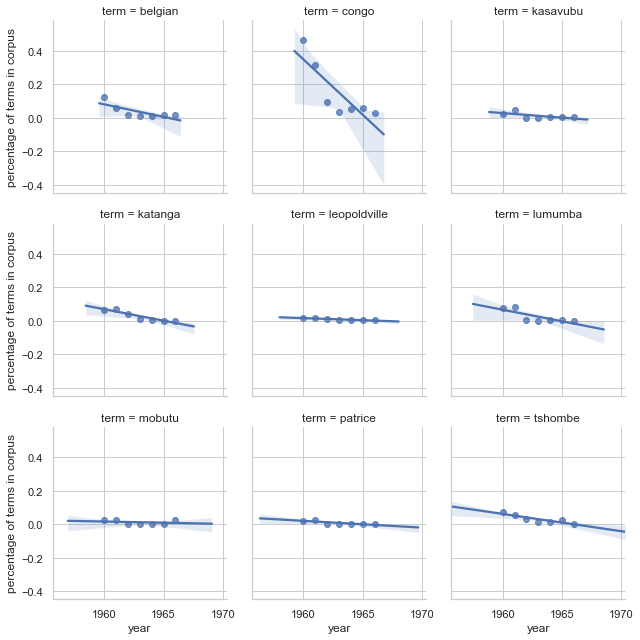

In [13]:
df_2 = pd.read_csv('grouped_totals.csv')
df_2 = df_2.drop(['Unnamed: 0'], axis=1)
df_2.rename(columns={'page_number': 'pn', 'tokenized_counts': 'tc'}, inplace=True)
f = pd.merge(final_group, df_2, on=['year'])
f['perc'] = f.word_counts/ f.tc
# g = sns.lmplot(x="year", y="perc",
#                height=5, data=df)
f['percentage of terms in corpus'] = f.word_counts / f.tc * 100
sns.set_style("whitegrid")
g = sns.lmplot(x="year", y='percentage of terms in corpus',
           col="term", data=f, col_wrap=3, height=3);

g.axes.flatten()
axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Distributions over Time Per Term')

g.savefig('congo_terms.png')
# final_group.rename(columns={'page_number_y': 'pn', 'tokenized_counts_y': 'tc'}, inplace=True)
# tm = pd.melt(final_group, id_vars=['year', 'term'])
# # tm.variable.unique()
# grouped_df = final_group.groupby(['year'])['word_counts'].sum().reset_index()
# grouped_pages = final_group.groupby(['year'])['page_number'].count().reset_index()
# grouped_tokens = df.groupby(['year', 'term'])['tokenized_counts'].sum().reset_index()
# co = pd.merge(grouped_df, grouped_pages, on=['year', 'term'])
# final_group = pd.merge(co, grouped_tokens, on=['year', 'term'])
# f['perc'] = f.word_counts / f.tc
# alt.Chart(f).mark_bar().encode(
#     x='year',
#     y='perc:Q',
# ).properties(height=50, width=400)

In [15]:
df_2.year.dtype

dtype('int64')

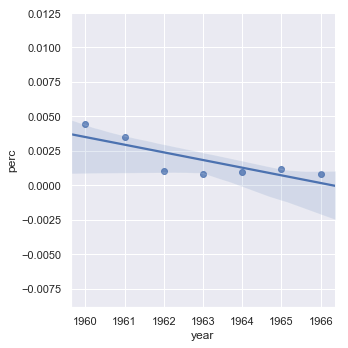

In [442]:
g = sns.lmplot(x="year", y="perc", data=f);

In [510]:
import statsmodels.api as sm

X = f["year"]
y = f["perc"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   perc   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     20.03
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           3.32e-05
Time:                        11:48:05   Log-Likelihood:                 410.57
No. Observations:                  63   AIC:                            -819.1
Df Residuals:                      62   BIC:                            -817.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year        1.036e-07   2.31e-08      4.476      0.000    5.73e-08     1.5e-07
==============================================================================
Omnibus:                       88.726   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1232.664
Skew:                           4.195   Prob(JB):                    2.14e-268
Kurtosis:                      22.980   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [526]:
terms = f.term.unique()
for t in terms:
    df = f.loc[f.term == t]
    X = df["year"]
    y = df["perc"]

    # Note the difference in argument order
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    print(t, 'f pvalue: ', round(model.f_pvalue, 4), 'r adj: ', round(model.rsquared_adj, 4), 'r: ', round(model.rsquared,4))

belgian f pvalue:  0.0295 r adj:  0.5026 r:  0.5736
congo f pvalue:  0.0237 r adj:  0.5352 r:  0.6016
kasavubu f pvalue:  0.0887 r adj:  0.3083 r:  0.4071
katanga f pvalue:  0.0288 r adj:  0.5062 r:  0.5767
leopoldville f pvalue:  0.0002 r adj:  0.9002 r:  0.9145
lumumba f pvalue:  0.0942 r adj:  0.2962 r:  0.3967
mobutu f pvalue:  0.0642 r adj:  0.3709 r:  0.4608
patrice f pvalue:  0.0805 r adj:  0.3274 r:  0.4235
tshombe f pvalue:  0.0032 r adj:  0.7534 r:  0.7887


In [508]:
from sklearn import linear_model
X = f['year'].values
y = f['perc'].values
X = X.reshape(len(f.index), 1)
y = y.reshape(len(f.index), 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
# print(predictions)[0:5]
# lm.score(X,y)
lm.coef_

array([[-6.18228082e-05]])

In [402]:

df['month_index'] = pd.to_datetime(df['month'], format='%B', errors='coerce').dt.month
df = df.sort_values(by=['year', 'month_index'])
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='ignore')
df['string_date'] = df.date.astype(str)

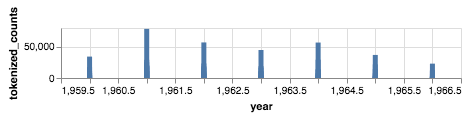

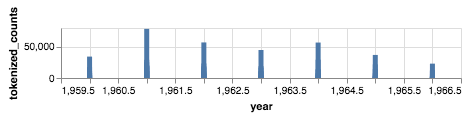

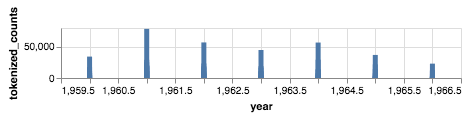

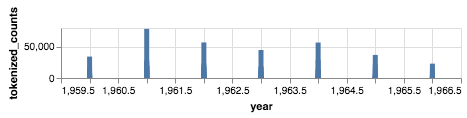

In [403]:
alt.Chart(final_group).mark_bar().encode(
    x='year',
    y='tokenized_counts:Q',
).properties(height=50, width=400)


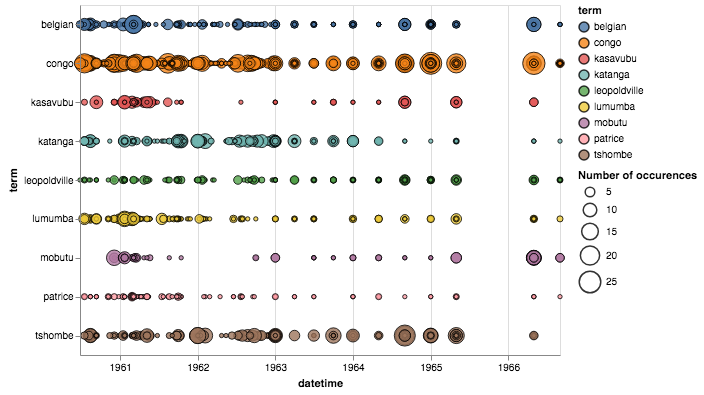

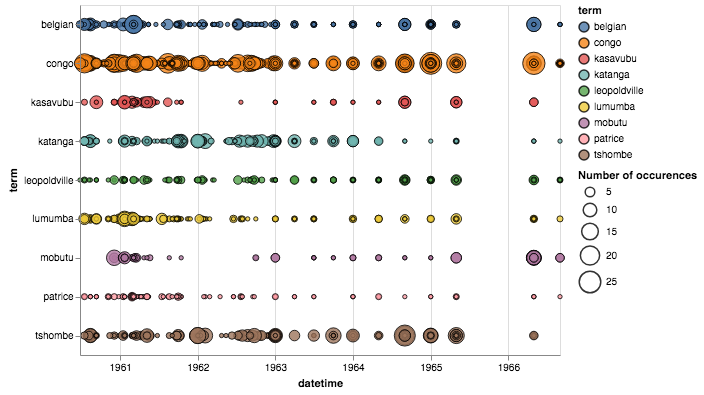

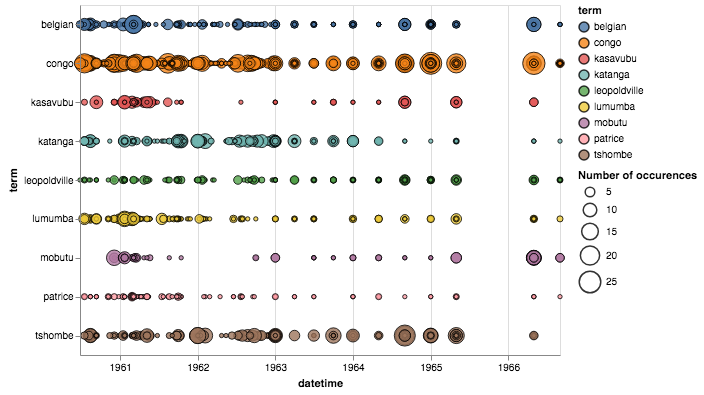

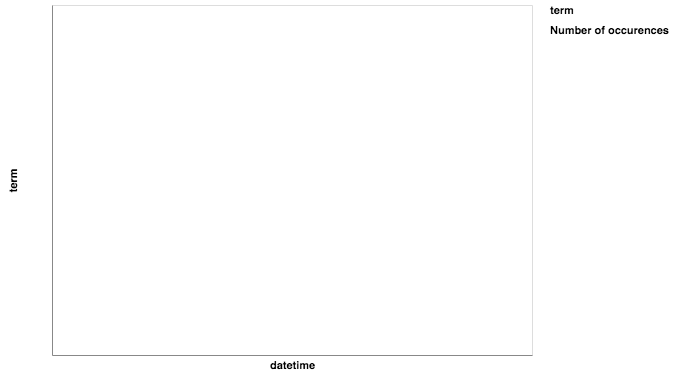

In [405]:
## Distributions by individual pages
alt.Chart(df_1).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('datetime:T', axis=alt.Axis(labelAngle=0)),
    alt.Y('term:N'),
    alt.Size('word_counts:Q',
        scale=alt.Scale(range=[0, 500]),
        legend=alt.Legend(title='Number of occurences')
    ),
    alt.Color('term:N'),
    tooltip=['term', 'word_counts', 'string_date']
).properties(
    width=480,
    height=350
)

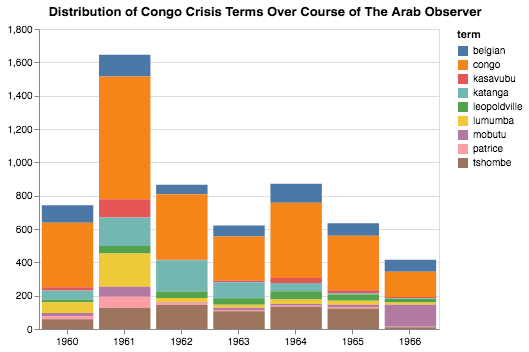

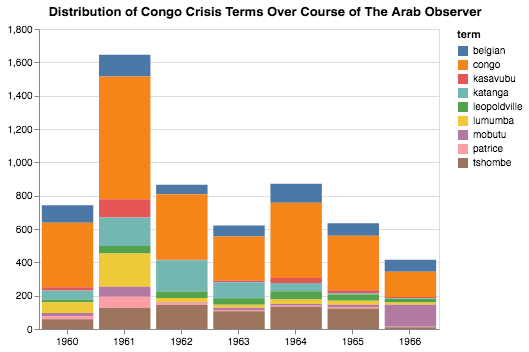

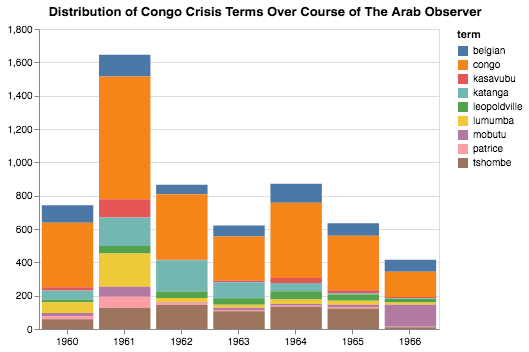

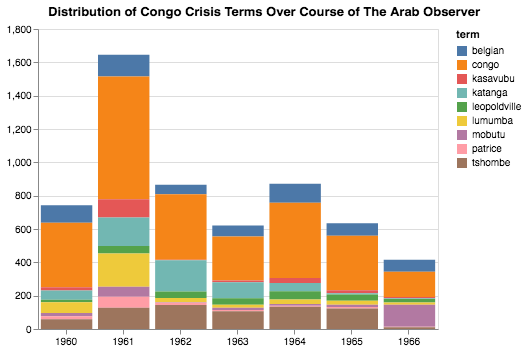

In [498]:
### Grouped by issues essentially 
alt.Chart(final_group).mark_bar().encode(
    x=alt.X('year:N', axis=alt.Axis(title='', labelAngle=0)),
    y=alt.Y('sum(word_counts)', axis=alt.Axis(title='')),
    color='term'
).properties(
    width=400,
    title='Distribution of Congo Crisis Terms Over Course of The Arab Observer'
)

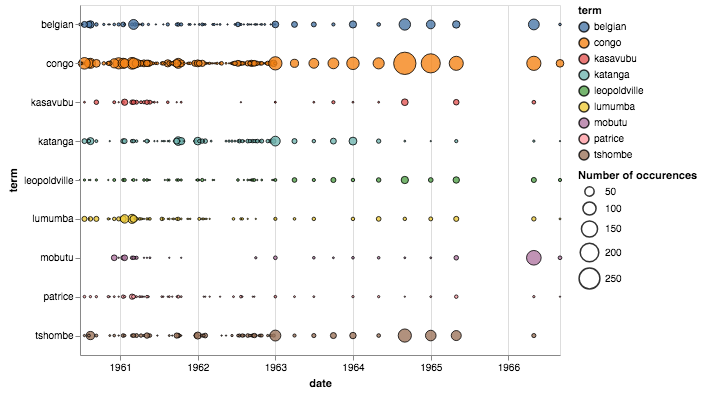

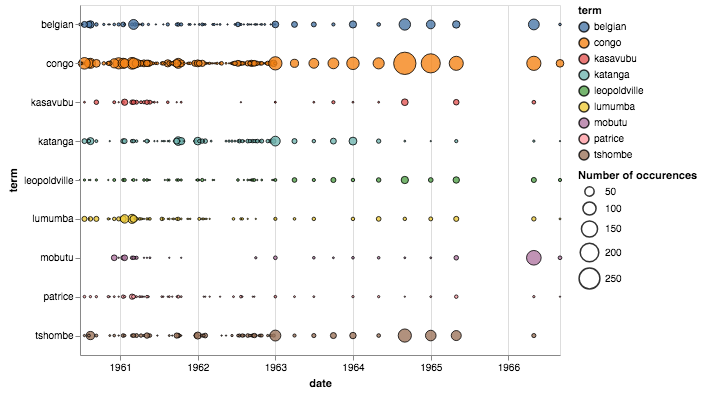

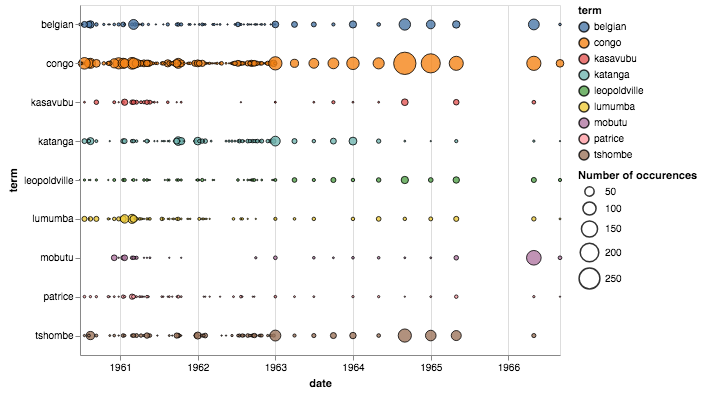

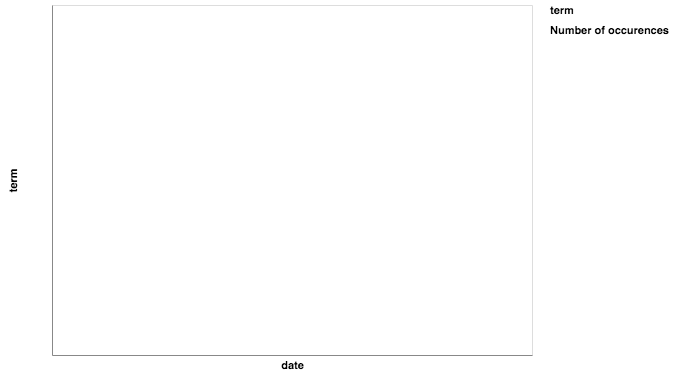

In [407]:
### Grouped by issues
grouped_df = df.groupby(['date', 'term'])['word_counts'].sum().reset_index()
# grouped_df['string_date'] = df.date.astype(str)
alt.Chart(grouped_df).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('date:T', axis=alt.Axis(labelAngle=0)),
    alt.Y('term:N'),
    alt.Size('word_counts:Q',
        scale=alt.Scale(range=[0, 500]),
        legend=alt.Legend(title='Number of occurences')
    ),
    alt.Color('term:N'),
    tooltip=['term',  'word_counts']
).properties(
    width=480,
    height=350
)

In [411]:
grouped_df = df.groupby(['date', 'term'])['word_counts'].sum().reset_index()
grouped_df['string_date'] = grouped_df.date.astype(str)
grouped_pages = df.groupby(['date', 'term'])['page_number'].count().reset_index()
grouped_pages['string_date'] = grouped_pages.date.astype(str)
co = pd.merge(grouped_df, grouped_pages, on=['date', 'term', 'string_date'])

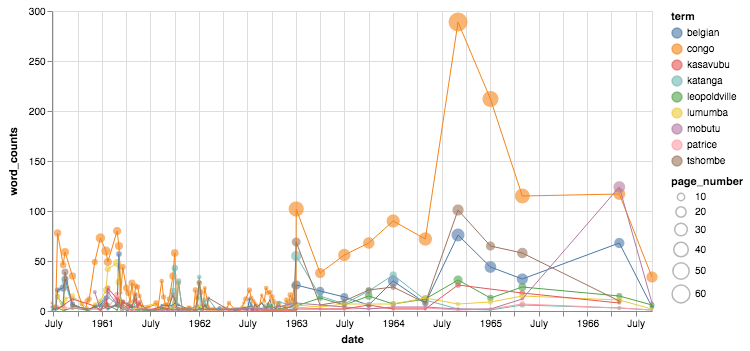

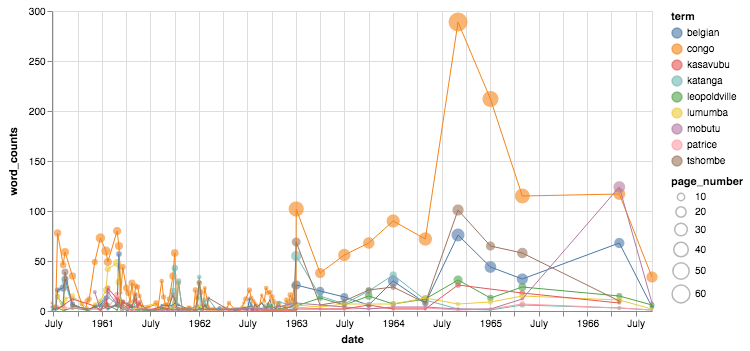

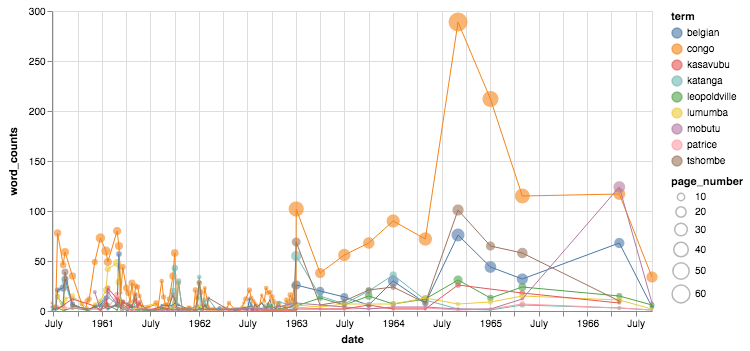

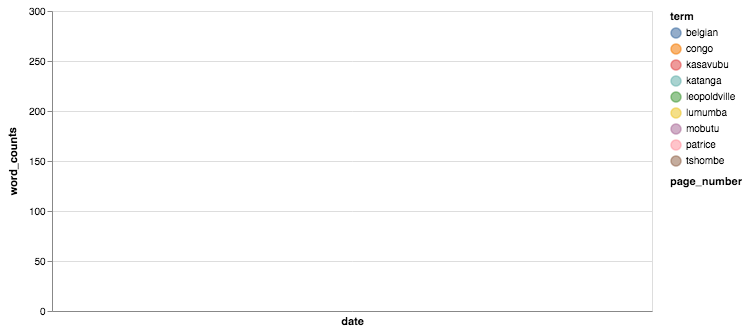

In [412]:
highlight = alt.selection(type='single', on='mouseover',
                          fields=['term'], nearest=True)

base = alt.Chart(co).encode(
    x='date:T',
    y='word_counts',
    color='term:N',
    size='page_number'
)

points = base.mark_circle().encode(
    opacity=alt.value(0.6)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

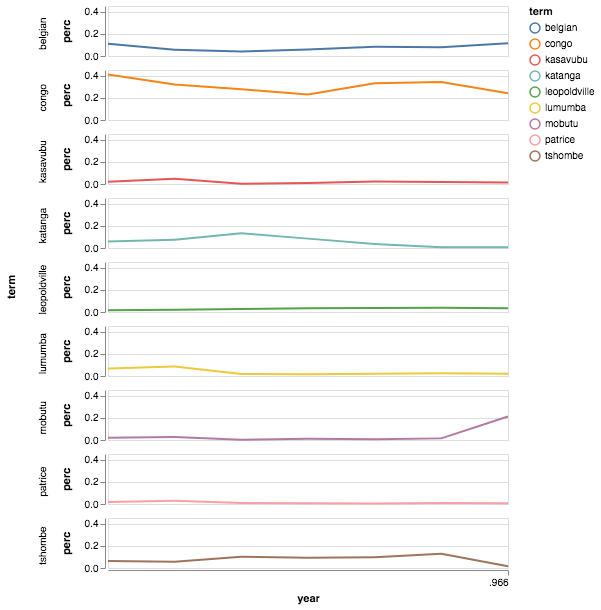

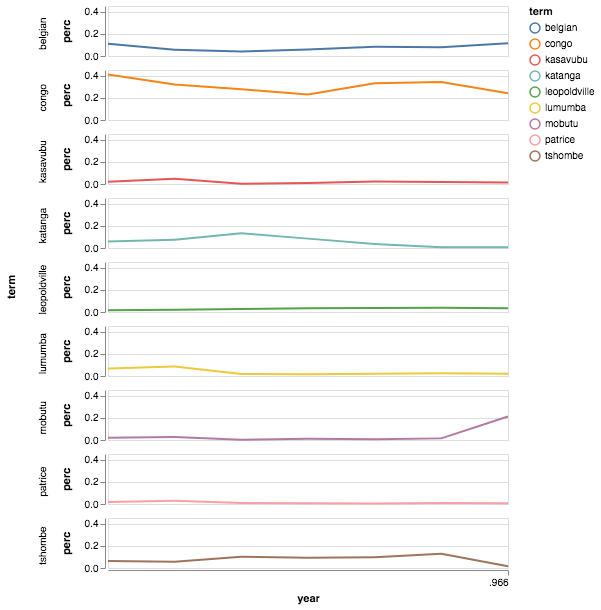

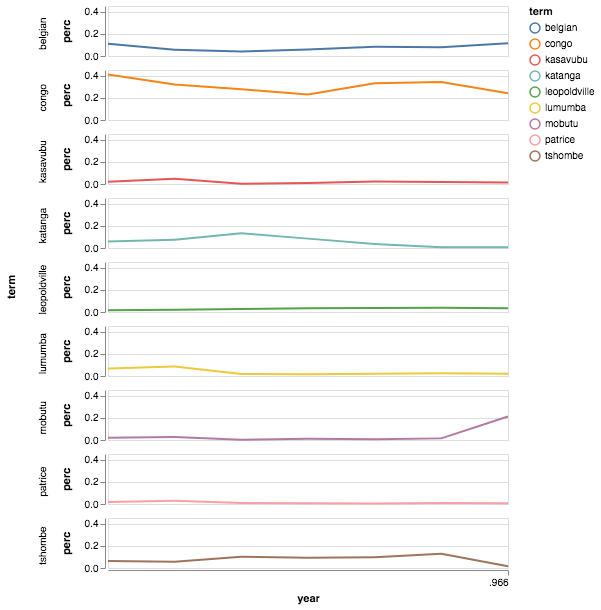

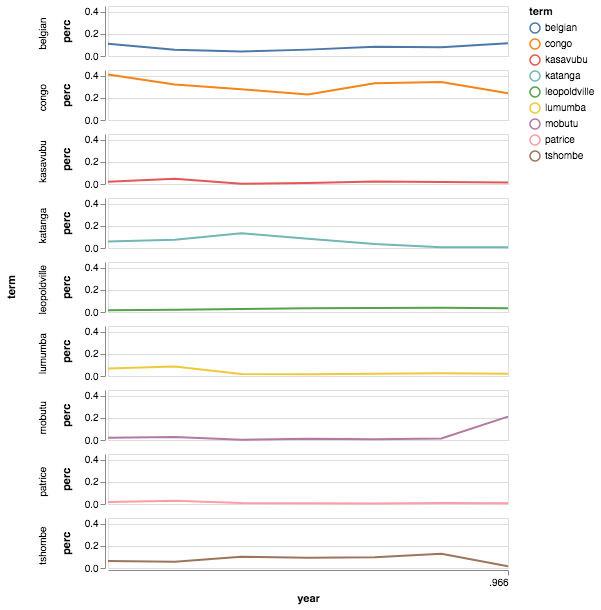

In [408]:
df = final_group

df['perc'] = (df.word_counts/ df.all_tokens) * 100
alt.Chart(df).mark_line().encode(
    x='year:T',
    y='perc:Q',
    color='term:N',
    row=alt.Row('term:N'
    )
).properties(height=50, width=400)

In [93]:
two = co.loc[(co.term == 'patrice') | (co.term =='lumumba')]

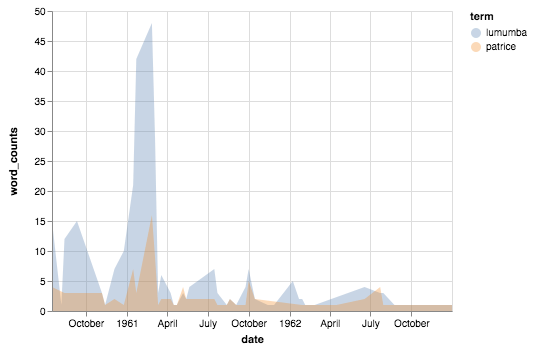

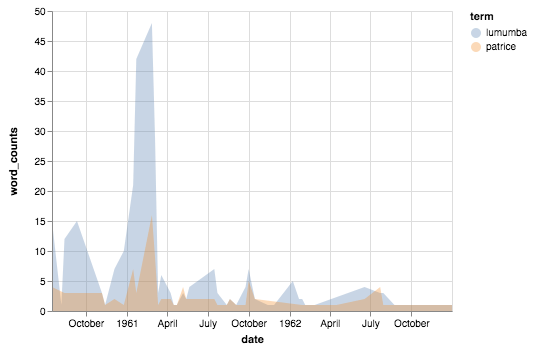

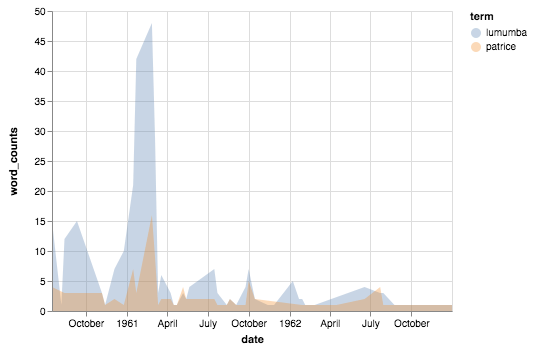

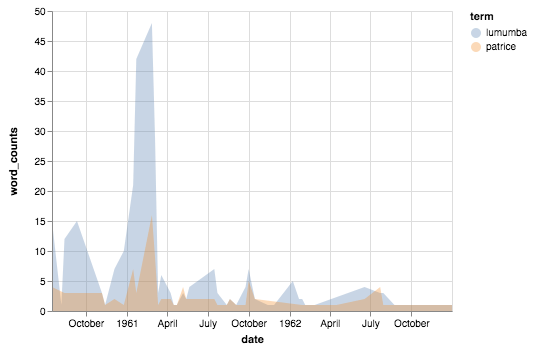

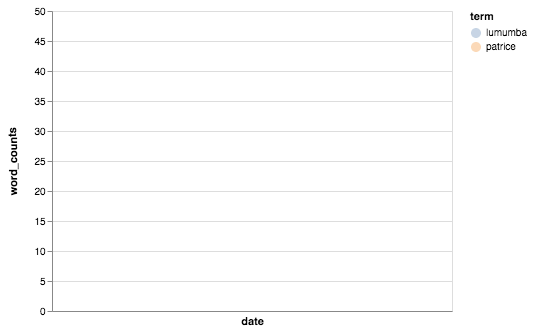

In [104]:
alt.Chart(two).mark_area(opacity=0.3).encode(
    x='date:T',
    y=alt.Y('word_counts', stack=None),
    color='term',
)

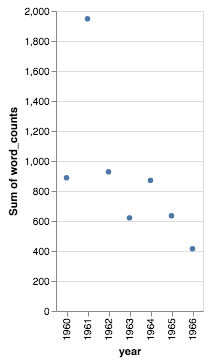

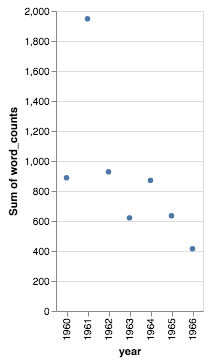

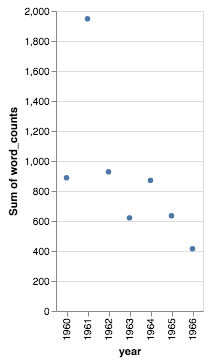

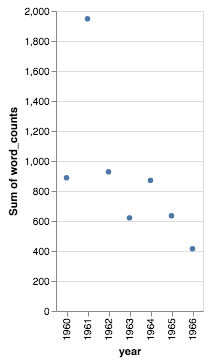

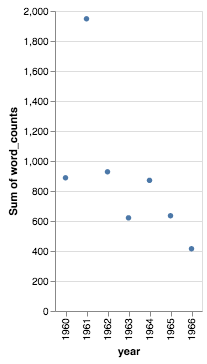

In [307]:
d = final_group[(final_group.term == 'patrice')]
alt.Chart(final_group).mark_circle().encode(
    x='year:N',
    y='sum(word_counts)',
)


In [413]:
t = final_group[(final_group.term == 'mobutu')]
corr= final_group.corr()
corr.style.background_gradient().set_precision(2)

In [414]:
import numpy as np
result_df = final_group.groupby(['year', 'term']).apply(lambda g: np.polyfit(g.word_counts, g.tokenized_counts, 1)).apply(pd.Series).rename(columns={0:'slope', 1:'intercept'}).reset_index()


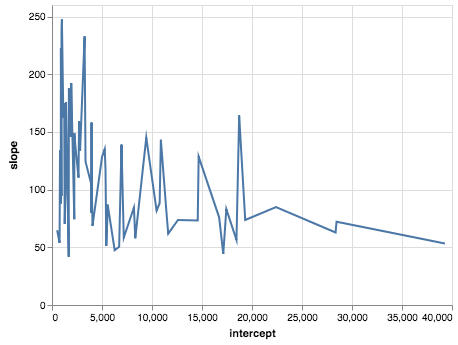

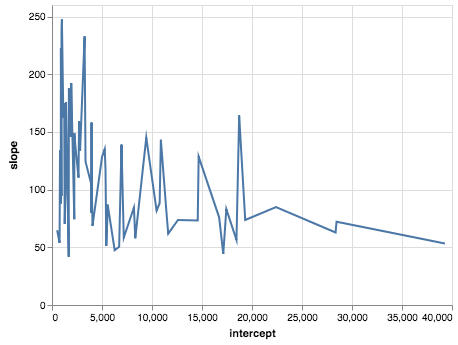

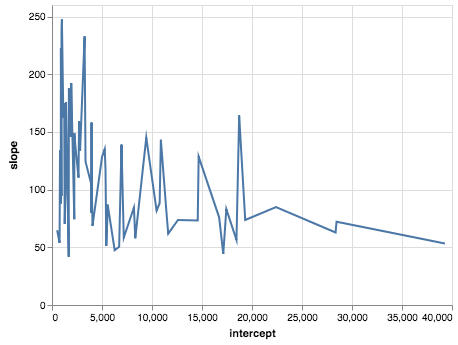

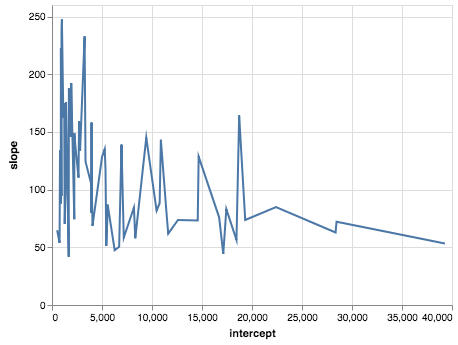

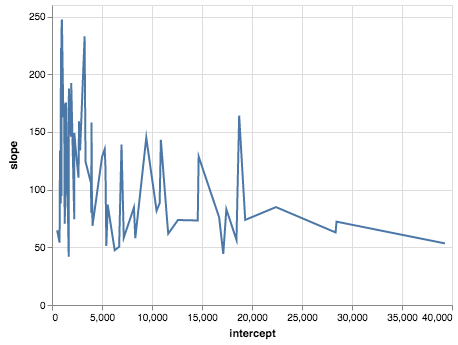

In [270]:

t = result_df[(result_df.term == 'mobutu')]
points = alt.Chart(d).mark_circle().encode(
    x='year:N',
    y='word_counts',
)
fit = polynomial_fit = alt.Chart(result_df).mark_line().encode(
    x='intercept',
    y='slope'
)
# points + fit
fit

patrice
congo
lumumba
tshombe
leopoldville
belgian
mobutu
kasavubu
belgian
mobutu
kasavubu
katanga


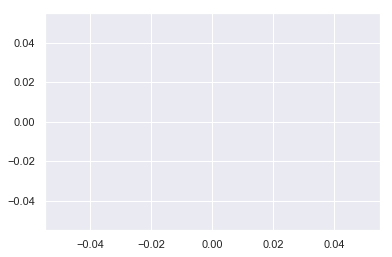

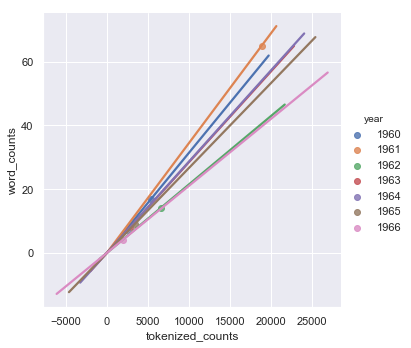

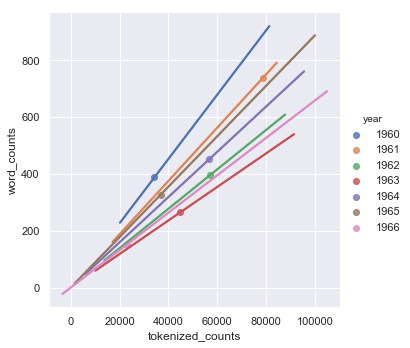

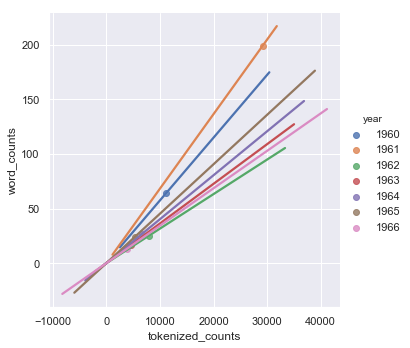

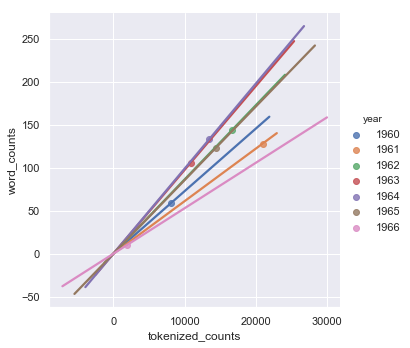

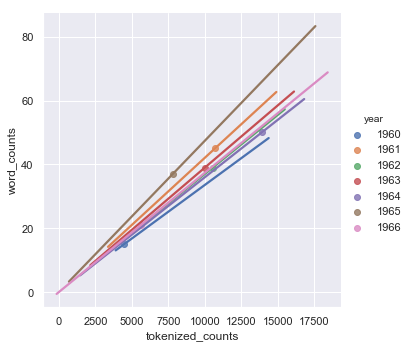

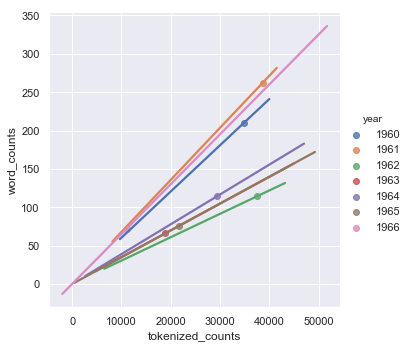

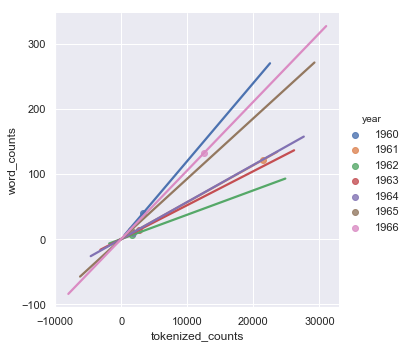

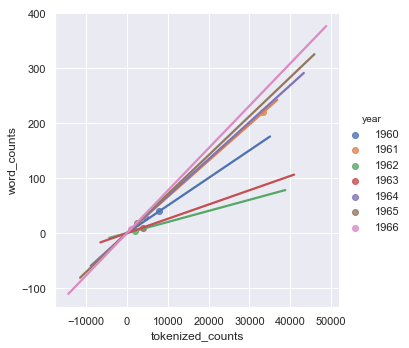

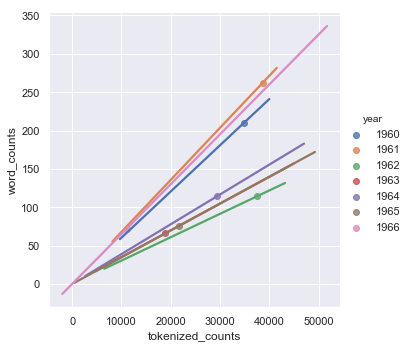

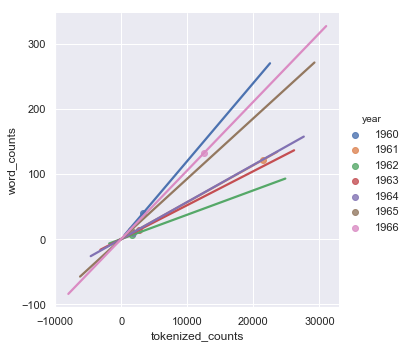

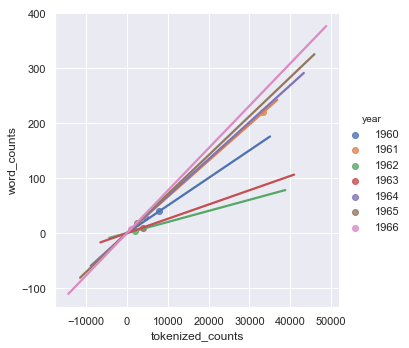

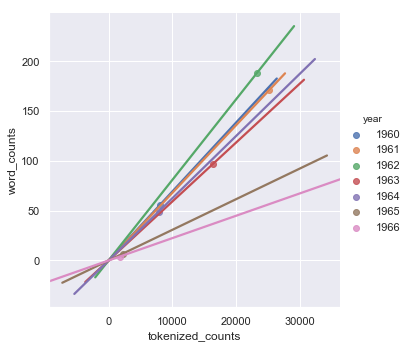

In [265]:


terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','belgian','mobutu','kasavubu','katanga']

for t in terms:
    df = final_group[(final_group.term == t)]
    print(t)
    plt.plot()
    g = sns.lmplot(x="tokenized_counts", y="word_counts", hue="year",
               height=5, data=df)

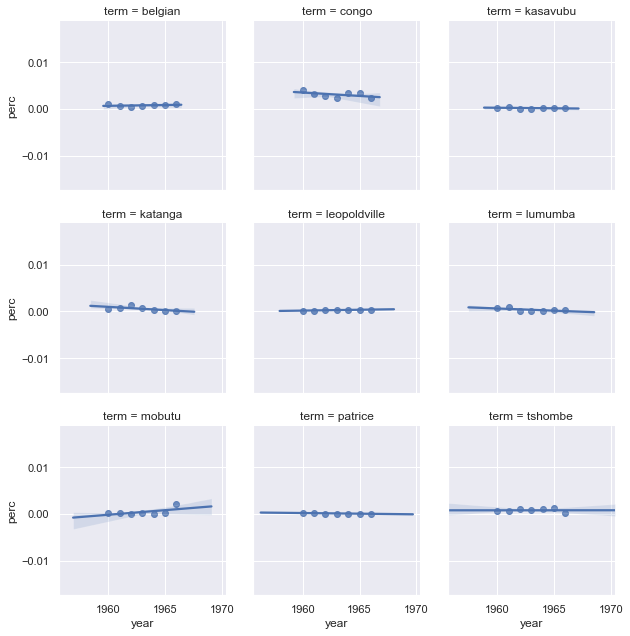

In [419]:
df = final_group

df['perc'] = df.word_counts/ df.all_tokens
# g = sns.lmplot(x="year", y="perc",
#                height=5, data=df)
g = sns.lmplot(x="year", y="perc",
           col="term", data=df, col_wrap=3, height=3);

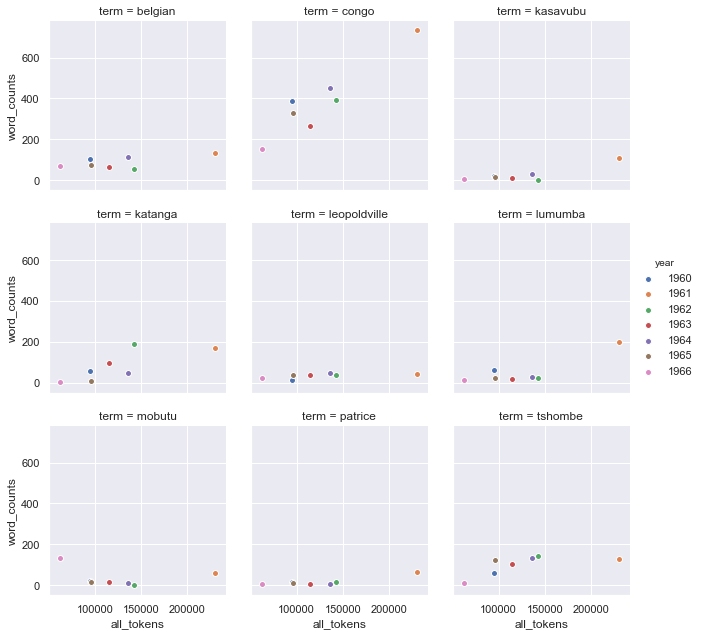

In [416]:
g = sns.FacetGrid(final_group, col="term", hue='year', col_wrap=3, height=3)
g = (g.map(plt.scatter, "all_tokens", "word_counts", edgecolor="w").add_legend())

In [176]:
### Compare named entities to tokens identitfied with stopwords removed across all three years
# melted_counts = pd.melt(co, id_vars=['page_number', 'string_date', 'date'], value_name='value')
# melted_counts.variable.unique()
final_group[0:2]

year     term  word_counts  page_number  tokenized_counts
0  1960  belgian          210           88             34868
1  1960    congo          387           88             34255

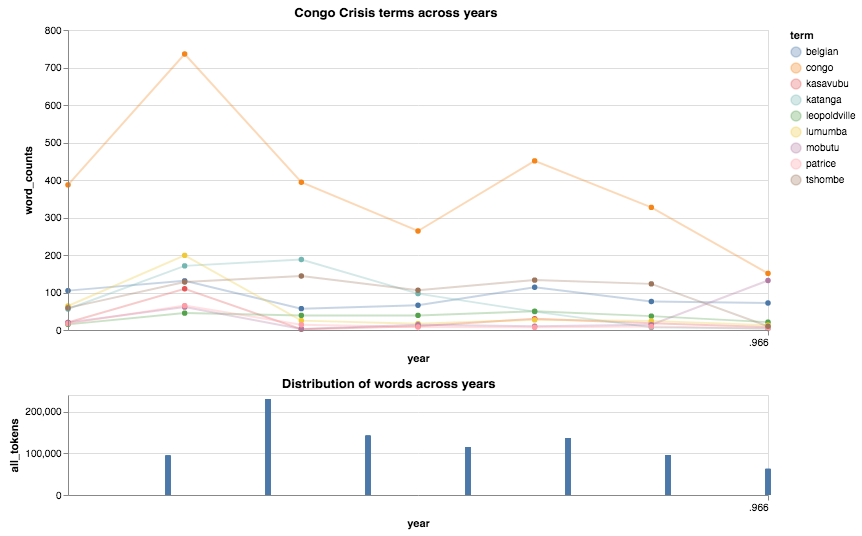

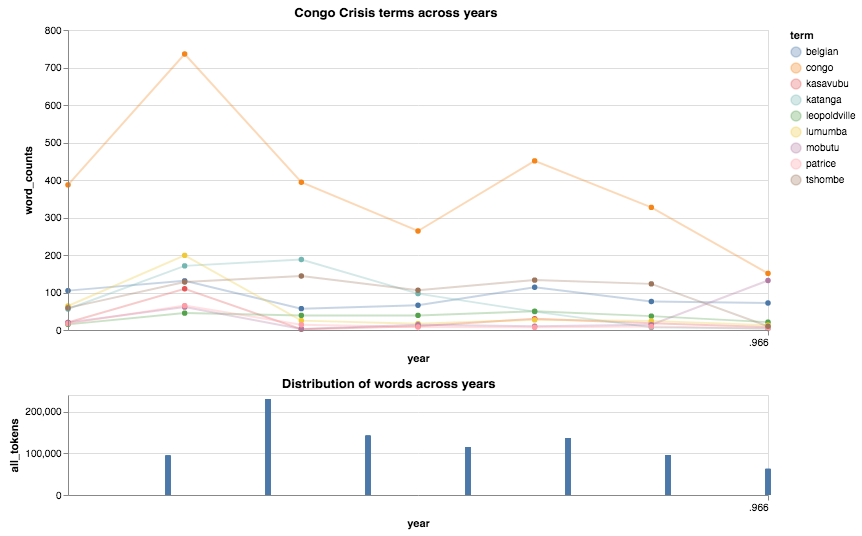

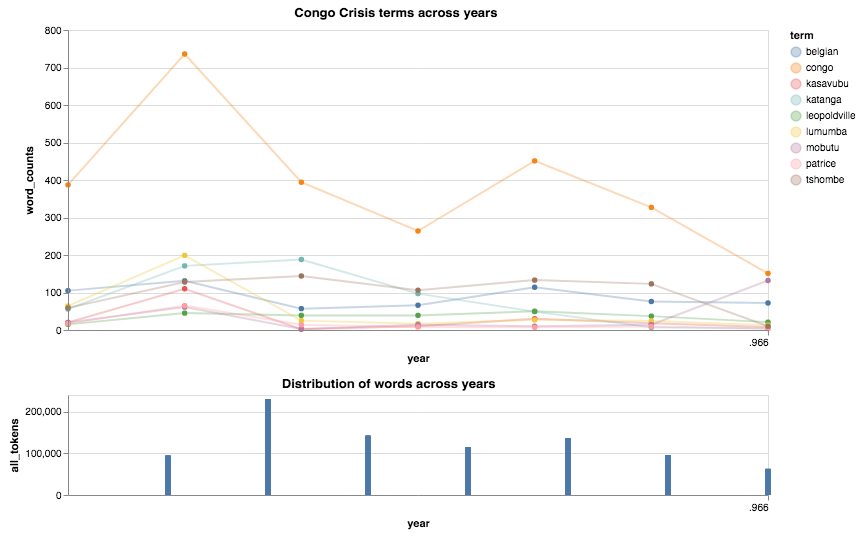

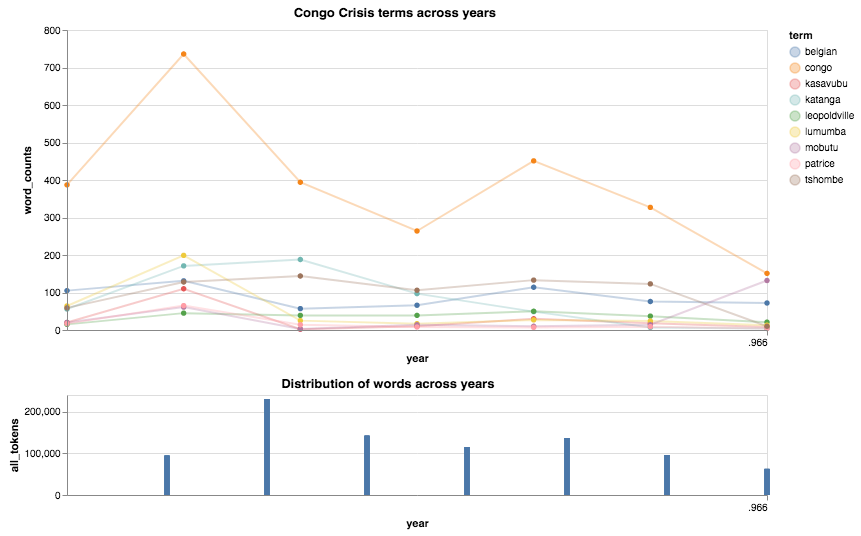

In [417]:
counts = final_group
pts = alt.selection(type="single", fields=['year'])
color = alt.condition(pts,
                      alt.Color('term:N'),
                      alt.value('lightgray'))

lines = alt.Chart(counts).mark_line(point=True, opacity=0.3).encode(
    x=alt.X('year:T'),
    y='word_counts:Q',
    color=color,
    tooltip=['term', 'word_counts']
).properties(
    title='Congo Crisis terms across years',
    width=700,
    height=300,
)
x_ticks = alt.Chart(counts).mark_bar(opacity=0.7).encode(
    x=alt.X('year:T'),
    y=alt.Y('all_tokens'),
    tooltip=['all_tokens']
).properties(
    width=700,
    height=100,
    selection=pts,
    title='Distribution of words across years'
)
(lines & x_ticks)

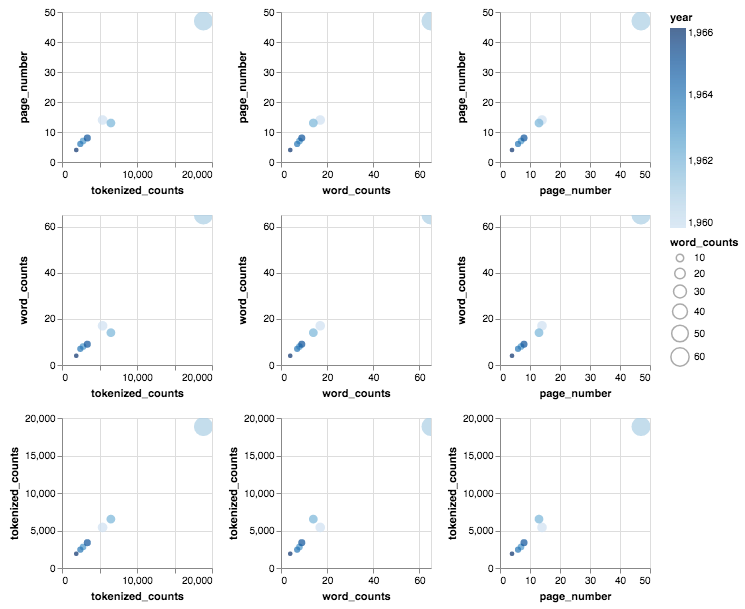

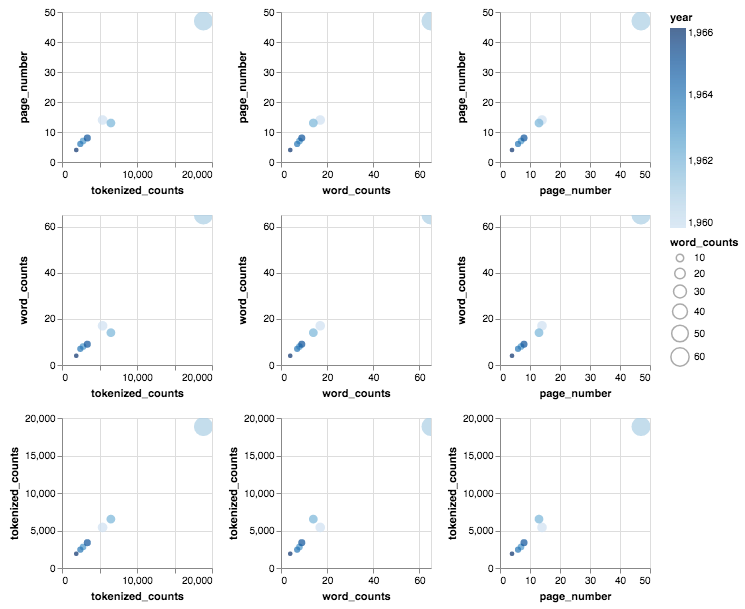

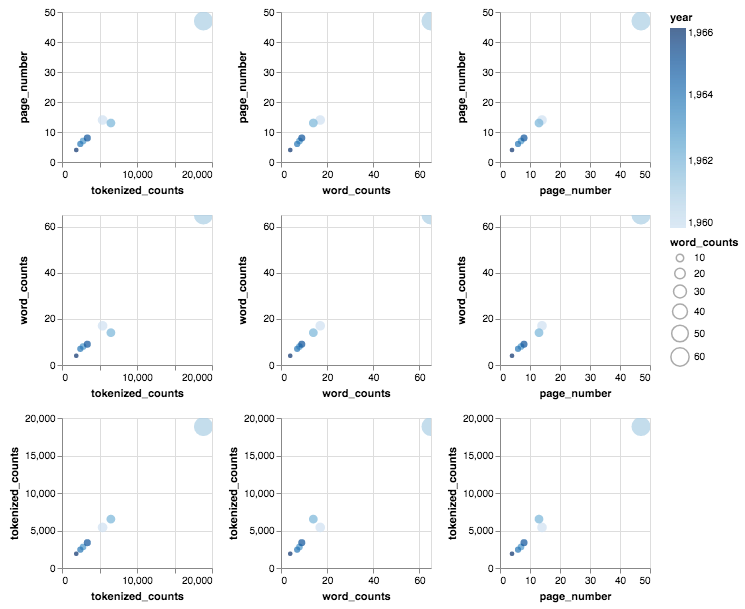

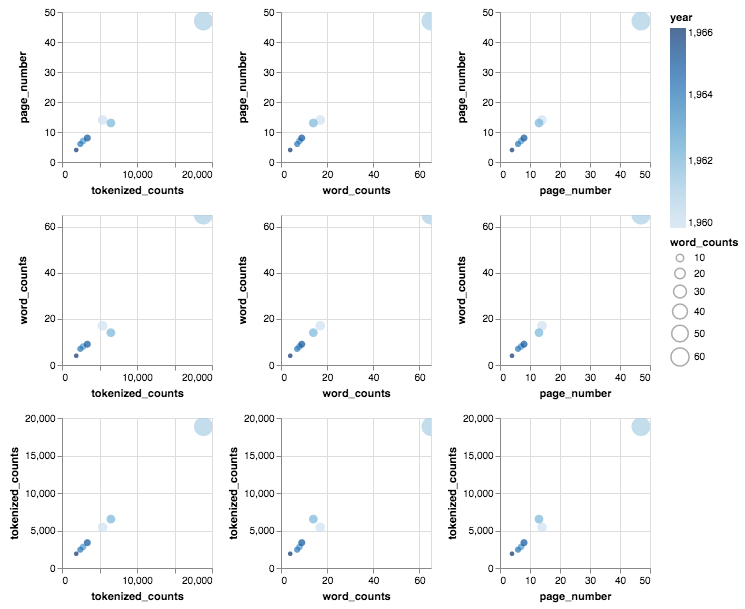

In [418]:
d = final_group[(final_group.term == 'patrice')]
alt.Chart(d).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='year',
    size='word_counts'
).properties(
    width=150,
    height=150
).repeat(
    row=['page_number', 'word_counts', 'tokenized_counts'],
    column=[ 'tokenized_counts','word_counts','page_number']
).interactive()

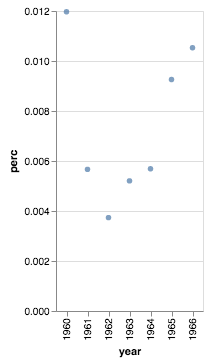

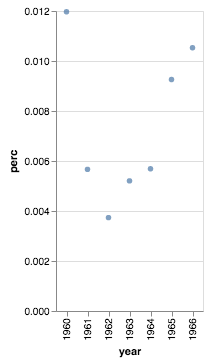

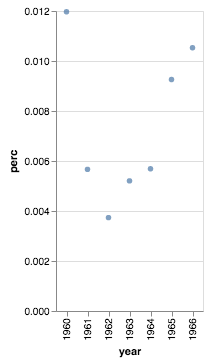

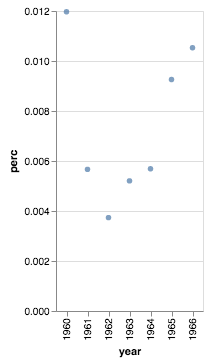

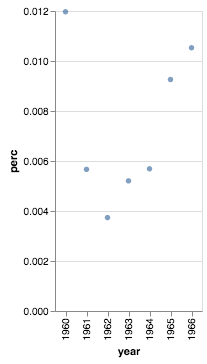

In [282]:
final_group['perc'] = final_group.word_counts / final_group.tokenized_counts

final_group = final_group.sort_values(by=['perc'])
f = final_group[(final_group.term == 'mobutu')]
alt.Chart(final_group).mark_circle().encode(
    x='year:N',
    y='perc',
)

In [284]:
final_group.sort_values(by=['year','term'])

year          term  word_counts  page_number  tokenized_counts      perc
0   1960       belgian          210           88             34868  0.006023
1   1960         congo          387           88             34255  0.011298
2   1960      kasavubu           40           18              7970  0.005019
3   1960       katanga           56           21              8089  0.006923
4   1960  leopoldville           15           11              4470  0.003356
5   1960       lumumba           64           28             11133  0.005749
6   1960        mobutu           40            8              3342  0.011969
7   1960       patrice           17           14              5411  0.003142
8   1960       tshombe           59           20              8099  0.007285
9   1961       belgian          262           94             38642  0.006780
10  1961         congo          736          195             78586  0.009366
11  1961      kasavubu          220           82             33428  0.006581
12  1961       katanga          171           61             25191  0.006788
13  1961  leopoldville           45           25             10698  0.004206
14  1961       lumumba          199           76             29149  0.006827
15  1961        mobutu          122           52             21532  0.005666
16  1961       patrice           65           47             18855  0.003447
17  1961       tshombe          128           52             20919  0.006119
18  1962       belgian          114           78             37432  0.003046
19  1962         congo          394          140             56908  0.006923
20  1962      kasavubu            4            4              1980  0.002020
21  1962       katanga          188           49             23247  0.008087
22  1962  leopoldville           39           22             10539  0.003701
23  1962       lumumba           25           17              7906  0.003162
24  1962        mobutu            6            4              1606  0.003736
25  1962       patrice           14           13              6519  0.002148
26  1962       tshombe          144           35             16655  0.008646
27  1963       belgian           66           48             18910  0.003490
28  1963         congo          264          118             44798  0.005893
29  1963      kasavubu           10            8              3846  0.002600
..   ...           ...          ...          ...               ...       ...
33  1963        mobutu           14            8              2690  0.005204
34  1963       patrice            8            7              2808  0.002849
35  1963       tshombe          106           26             10863  0.009758
36  1964       belgian          114           62             29330  0.003887
37  1964         congo          451          135             56720  0.007951
38  1964      kasavubu           30           10              4458  0.006729
39  1964       katanga           49           18              7843  0.006248
40  1964  leopoldville           50           32             13900  0.003597
41  1964       lumumba           27           15              6706  0.004026
42  1964        mobutu           10            6              1758  0.005688
43  1964       patrice            7            6              2444  0.002864
44  1964       tshombe          133           33             13430  0.009903
45  1965       belgian           76           50             21772  0.003491
46  1965         congo          327           91             36895  0.008863
47  1965      kasavubu           18            6              2538  0.007092
48  1965       katanga            7            6              2275  0.003077
49  1965  leopoldville           37           20              7806  0.004740
50  1965       lumumba           24           13              5299  0.004529
51  1965        mobutu           14            4              1512  0.009259
52  1965       patrice            9            8              3377  0.002665
